[1. 0.]
PSF Term 0 0 0
PSF Term 0 0 0
EID term 0 0 0
PSF Term 1 0 0
EID term 1 0 0
EID term 2 0 1
EID term 3 0 1
PSF Term 1 1 0
PSF Term 0 1 0
EID term 0 1 0
PSF Term 1 1 0
EID term 1 1 0
EID term 2 1 1
EID term 3 1 1
PSF Term 2 2 0
EID term 0 2 0
EID term 1 2 0
PSF Term 2 2 0
EID term 2 2 1
PSF Term 3 2 0
EID term 3 2 1
PSF Term 3 3 0
EID term 0 3 0
EID term 1 3 0
PSF Term 2 3 0
EID term 2 3 1
PSF Term 3 3 0
EID term 3 3 1
[1. 0.]
PSF Term 0 0 0
PSF Term 0 0 0
EID term 0 0 0
PSF Term 1 0 0
EID term 1 0 0
EID term 2 0 1
EID term 3 0 1
PSF Term 1 1 0
PSF Term 0 1 0
EID term 0 1 0
PSF Term 1 1 0
EID term 1 1 0
EID term 2 1 1
EID term 3 1 1
PSF Term 2 2 0
EID term 0 2 0
EID term 1 2 0
PSF Term 2 2 0
EID term 2 2 1
PSF Term 3 2 0
EID term 3 2 1
PSF Term 3 3 0
EID term 0 3 0
EID term 1 3 0
PSF Term 2 3 0
EID term 2 3 1
PSF Term 3 3 0
EID term 3 3 1


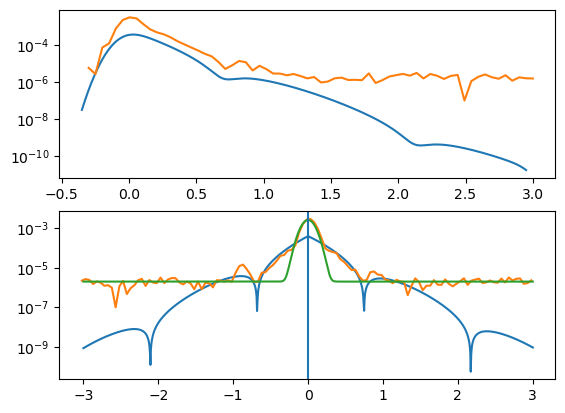

In [4]:
#maindir = '/home/matthew/Desktop/DataOutputs/HFWM DATA/'
maindir ='C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Lab Data/'
import os 
import numpy as np 
from resources.obefitfunct import fitfunctt 
from scipy import constants as c 
import matplotlib.pyplot as plt   
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve

def gauss(t,sigma,t0):
      return 1/(sigma*np.sqrt(np.pi*2))*np.exp(-.5*((t-t0)/(sigma))**2)
directory =maindir+'/HFWMV2 CS NW InitialTest/LongCollections/Results/'
T3reffile = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM815135T3refcut.csv'
T12file = '2mW1mW2mWphotonechok1-0.3ps3.0psk3-3.0ps3.0psk2-4psFWHM815135T12cut.csv'

T3refdata = np.loadtxt(directory+T3reffile,delimiter=';')
T12data   = np.loadtxt(directory+T12file,delimiter=';')
ol21 = 1.0#overlap of hh exciton state
ol61 = 1.0#overlap of lh exciton state
oli21 = 0.0 #overlap of hh bound exciton state
oli61 = 0.0#overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.004/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.018/c.hbar #Acp0 = [Ex1   ,Ex2   , # 0,1
  
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 3.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 3.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 0.5e-121#
p0 = [Ex1   ,Ex2   , # 0,1
      EB    ,ol21  , # 2,3
      ol61  ,oli21 , # 4,5
      oli61 ,gm21  , # 6,7
      gm61, gmi21  , # 8,9
      gmi61, K     ]   # 10,11

t = T3refdata[:,0]*1e-12+7e-12
t = np.linspace(t[0],t[-1],1000)
dt = t[1]-t[0]
t0 =(t[-1]+t[0])/2
Pv = fftconvolve(fitfunctt(t,*p0),dt*gauss(t,.18e-12/2.335,t0),mode='same')

fig,axs = plt.subplots(2)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].plot(t*1e12-7.05,Pv)
axs[0].plot(T3refdata[:,0],T3refdata[:,1])

tau = T12data[:,0]*1e-12
tau = np.linspace(tau[0],tau[-1],1000)
t = 7.1e-12
dtau = tau[1]-tau[0]
tau0 =(tau[-1]+tau[0])/2
Pv = fitfunctt(t,*p0,tau=tau)

axs[1].plot(tau*1e12,Pv)
axs[1].plot(T12data[0:,0]-.02,T12data[0:,1])
axs[1].plot(tau*1e12,2e-6+5e-16*gauss(tau,.18e-12/2.355,tau0))
axs[1].axvline(0)

plt.show()

In [2]:
a = [1,2,3,4,5]
print(a[-1])

5


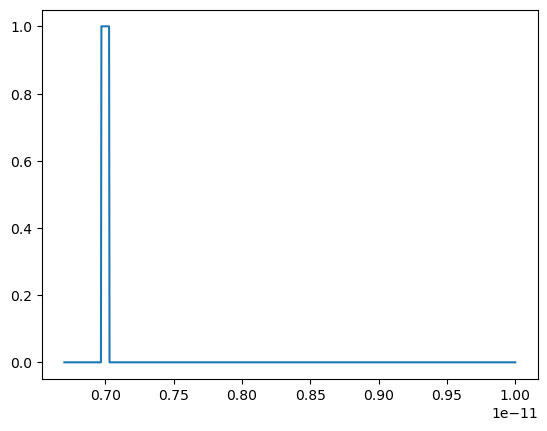

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
t = np.linspace(6.7e-12,10e-12,1000)
tau = 0e-12
tau13= 7e-12

def dirac(t,tau):
    a = 0+(np.abs(t-tau13)<.03e-12)&(np.abs(tau)<.03e-12)
    return a
plt.plot(t,dirac(t,tau))


In [15]:
a = np.zeros(100)
b = np.empty(100)
c = np.empty(100)
d = np.empty(100)
sf = np.vstack([a,b])
sf = np.vstack([sf,c])
print(sf.transpose())

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

[1. 0.]


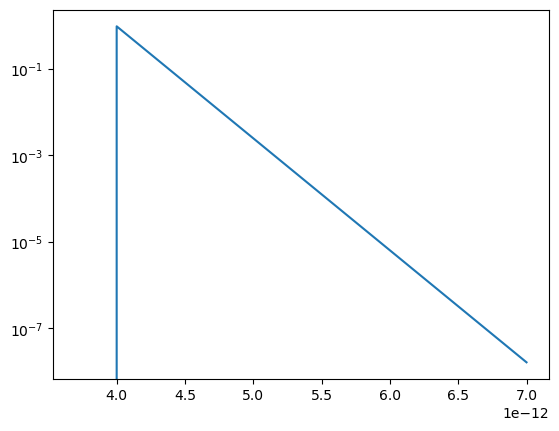

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as c
ol21 = 1#overlap of hh exciton state
ol61 = 1#overlap of lh exciton state
oli21 = 0.0007216690156471695 #overlap of hh bound exciton state
oli61 = 0.000923409156796965 #overlap of lh bound exciton state
Ex1 =  c.e*0.0029/c.hbar#exciton splitting energy
Ex2 =  c.e*0.006/c.hbar#Acceptor bound exciton splitting energy 
EB  = -c.e*0.020/c.hbar #Acp0 = [Ex1   ,Ex2   , # 0,1
gm21  = 3.5e12#hh Exciton dephasing rate /s <-Fit Parameter
gm61  = 3.5e12#lh Exciton dephasing rate /s <-Fit Parameter
gmi21 = 1.5e12#Impurity bound hh Exciton dephasing rate /s <-Fit Parameter
gmi61 = 1.5e12#Impurity bound lh Exciton dephasing rate /s <-Fit Parameter
K = 0.6e-112#
Ad = 7e-3

u1  = np.asarray([1.0,0.0])#polarization state pulse 1
u2  = np.asarray([1.0,0.0])#polarization state pulse 2
u3  = np.asarray([1.0,0.0])#polarization state pulse 3

N1  = 1.0e15 #Exciton density pulse 1
N2  = 1.0e15 #Exciton density pulse 2
N3  = 1.0e15 #Exciton density pulse 3

N1eh = 1.0e15 #electron hole pair density pulse 1
N2eh = 1.0e15 #electron hole pair density pulse 2
N3eh = 1.0e15 #electron hole pair density pulse 3

N1i = 1.0e15#Impurity bound Exciton density pulse 1 
N2i = 1.0e15#Impurity bound Exciton density pulse 2
N3i = 1.0e15#Impurity bound Exciton density pulse 3



sigx   = 0.00016 #exciton exciton scattering Parameter
sigeh  = 0.00050 #exciton electron/hole scattering Parameter 
sigxi  = 0.00016 #exciton impurity scattering Parameter
sigi   = 0.00000 #impurity impurity scattering Parameter
sigieh = 0.00050 #impurity electron/hole scattering Parameter
sigv = np.asarray([sigx,sigxi,sigi])
sigvchk = np.asarray(['sigx','sigxi','sigi'])

A =   N1   +N2   +N3         # total exciton density
Ai =  N1i  +N2i  +N3i         # total impurity bound exciton density
Aeh = N1eh +N2eh +N3eh # total electron hole density


T1 = 100.0e-12 #exciton Lifetime
Ti1= 100.0e-12 #impurity bound exciton Lifetime


E0 =c.e*(1.507)/c.hbar 
E21 =  E0 
E61 =  E0+Ex1 
Ei21 = E0+EB 
Ei61 = E0+Ex2+EB 
O21 =  E21 -1.0j*gm21  #Base damped oscillator frequency  
O61 =  E61 -1.0j*gm61  #Base damped oscillator frequency  
Oi21 = Ei21 -1.0j*gmi21 #Base damped oscillator frequency
Oi61 = Ei61 -1.0j*gmi61 #Base damped oscillator frequency

Ot21 =  O21 -1.0j*(sigx*A+ sigxi*Ai+sigeh*Aeh) #Base Eid oscillator frequency
Ot61 =  O61 -1.0j*(sigx*A+ sigxi*Ai+sigeh*Aeh)#Base Eid oscillator frequency
Oti21 = Oi21-1.0j*(sigi*Ai+sigxi*A+ sigieh*Aeh)#Base Eid oscillator frequency
Oti61 = Oi61-1.0j*(sigi*Ai+sigxi*A+ sigieh*Aeh)#Base Eid oscillator frequency

O  = np.asarray([ O21, O61, Oi21, Oi61]) 
Ot = np.asarray([Ot21,Ot61,Oti21,Oti61]) 

tau13 = 4.0e-12 
mu21 = ol21*np.asarray([1.0,0.0])   #dipole moment of hh exciton state 
mu61 = ol61*np.asarray([1.0,0.0])   #dipole moment of lh exciton state 
mui21 = oli21*np.asarray([1.0,0.0]) #dipole moment of hh bound exciton state 
mui61 = oli61*np.asarray([1.0,0.0]) #dipole moment of lh bound exciton state 


mu = np.vstack((mu21,mu61,mui21,mui61))
print(mu[0])
imp = 1 
nw  = 1
PSF = 1
EID = 1
def vecdim(a,b): 
    '''
        Element wise multiplier for vector time variables
        takes 
        a =  n length base vector element 
        b =  m length time axis over which to multiply 
        returns 
        nxm vector field
    
    '''
    v =  []
    for bi in b:
        v.append(a*bi)
    return np.asarray(v)
def aterm(t,tau,i,j,k):
    '''psf term for optical bloch equation solution 
    takes 
    t = the time delay for time resolving reference pulse
    tau = delay between first and second pulses 
    i = index of primary term for the 
    j = index of secondary term for the 
    k = scattering term for free exciton(0) or impurity(1)
    return 
    vector field 
    '''
    #print('PSF Term',i,j,k)
    if(k==0):
        wf = np.heaviside(tau,0.5)*np.exp(1.0j*(np.conj(O[i])+1.0j*(sigx*N1+sigxi*N1i+sigeh*N1eh))*tau)
        lf = np.exp(-(tau13-tau)/T1)
    else:
        wf =  np.heaviside(tau,0.5)*np.exp(1.0j*(np.conj(O[i])+1.0j*(sigi*N1i+sigxi*N1+sigieh*N1eh))*tau)
        lf = np.exp(-(tau13-tau)/Ti1)
    tf = np.exp(1.0j*Ot[j]*(tau13-t))
    cp = np.conj(mu[j])*mu[j].dot(u3)*mu[i].dot(u2)*np.conj(mu[i]).dot(np.conj(u1))
    return vecdim(wf*lf*tf,cp)
def bterm(t,tau,i,j,k):
    """
    complex conjugate psf term for optical bloch equation solution 
    takes 
    t = the time delay for time resolving reference pulse
    tau = delay between first and second pulses 
    i = index of primary term for the 
    j = index of secondary term for the 
    k = scattering term for free exciton(0) or impurity(1)
    return 
    vector field
    """
    if(k==0):    
        wf = np.heaviside(-tau,0.5)*np.exp(1.0j*(O[i]-1.0j*(sigx*N2+sigxi*N2i+sigeh*N2eh))*tau)
        lf = np.exp(-(tau13)/T1)
    else:
        wf = np.heaviside(-tau,0.5)*np.exp(1.0j*(O[i]-1.0j*(sigi*N2i+sigxi*N2+sigieh*N2eh))*tau)
        lf = np.exp(-(tau13)/Ti1)
    tf = np.exp(1.0j*Ot[j]*(tau13-t))
    cp = np.conj(mu[j])*mu[j].dot(u3)*np.conj(mu[i]).dot(np.conj(u1))*mu[i].dot(u2)
    return vecdim(wf*lf*tf,cp)
t  = np.linspace(3.7e-12,7e-12,1000)

plt.plot(t,np.abs(np.heaviside(t-tau13,0.5)*(aterm(t,0e-12,0,0,0)+bterm(t,0,0,0,0))[0]))
directory = 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Simulation Data/PSF and EID examples/'
outputfile = 'PSFexample.csv'
plt.yscale('log')
sf = np.vstack((t,np.abs(np.heaviside(t-tau13,0.5)*(aterm(t,0e-12,0,0,0)+bterm(t,0e-12,0,0,0))[0])))
np.savetxt(directory+outputfile,sf.transpose(),delimiter=';')


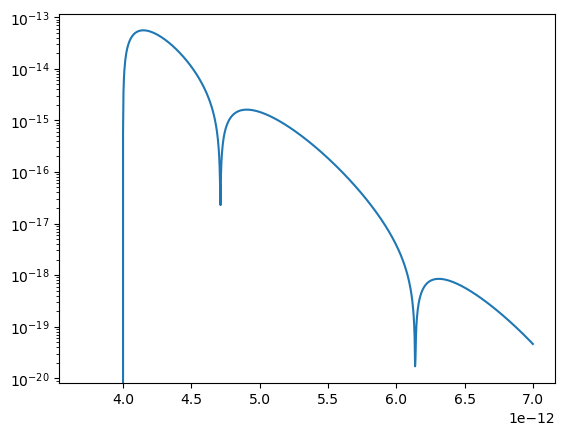

In [17]:
def cterm(t,tau,i,j,k):
    """
    EID term for optical bloch equation solution 
    takes 
    t = the time delay for time resolving reference pulse
    tau = delay between first and second pulses 
    i = index of primary term for the 
    j = index of secondary term for the 
    k = scattering term for free exciton(0) or impurity(1)
    return 
    vector field
    """
    #print('EID term',i,j,k)
    if(k==0):
        wf = np.heaviside(tau,0.5)*np.exp(1.0j*(np.conj(O[i])+1.0j*(sigx*N1+sigxi*N1i+sigeh*N1eh))*tau)
        lf = np.exp(-(tau13-tau)/T1)
        ei = T1*(1-np.exp((tau13-t)/T1))
    else:
        wf = np.heaviside(tau,0.5)*np.exp(1.0j*(np.conj(O[i])+1.0j*(sigi*N1i+sigxi*N1+sigieh*N1eh))*tau)
        lf = np.exp(-(tau13-tau)/Ti1)
        ei = Ti1*(1-np.exp((tau13-t)/Ti1))
    tf = np.exp(1.0j*Ot[j]*(tau13-t))
    cp = np.conj(mu[j])*mu[j].dot(u3)*mu[i].dot(u2)*np.conj(mu[i]).dot(np.conj(u1))
    return vecdim(wf*ei*lf*tf,cp)
def dterm(t,tau,i,j,k):
    """
    complex conjugate EID term for optical bloch equation solution 
    takes 
    t = the time delay for time resolving reference pulse
    tau = delay between first and second pulses 
    i = index of primary term for the 
    j = index of secondary term for the 
    k = scattering term for free exciton(0) or impurity(1) type term
    return 
    vector field
    """
    if(k==0):
        wf =np.heaviside(-tau,0.5)*np.exp(1.0j*(O[i]-1.0j*(sigx*N2+sigxi*N2i+sigeh*N2eh))*tau)
        lf = np.exp(-(tau13)/T1)
        ei =T1*(1-np.exp((tau13-t)/T1))
    else: 
        wf =np.heaviside(-tau,0.5)*np.exp(1.0j*(O[i]-1.0j*(sigi*N2+sigxi*N2i+sigieh*N2eh))*tau)
        lf = np.exp(-(tau13)/Ti1)
        ei =Ti1*(1-np.exp((tau13-t)/Ti1))
    tf = np.exp(1.0j*Ot[j]*(tau13-t))
    cp = np.conj(mu[j])*mu[j].dot(u3)*np.conj(mu[i]).dot(np.conj(u1))*mu[i].dot(u2)
    return vecdim(wf*ei*lf*tf,cp)
t  = np.linspace(3.7e-12,7e-12,1000)
plt.plot(t,np.abs(np.heaviside(t-tau13,0.5)*(cterm(t,0e-12,0,1,0)+dterm(t,0,1,0,0))[0]))
plt.yscale('log')
directory = 'C:/Users/mattl/OneDrive - University of Cincinnati/Desktop/Simulation Data/PSF and EID examples/'
outputfile = 'EIDexample.csv'

sf = np.vstack((t,np.abs(np.heaviside(t-tau13,0.5)*(cterm(t,0e-12,0,1,0)+dterm(t,0,1,0,0))[0])))
np.savetxt(directory+outputfile,sf.transpose(),delimiter=';')
